# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the Dataset

In [2]:
df = pd.read_csv('house_price_data.csv')

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Explanatory Data Analysis (EDA)

<strong>I) Missing Values</strong>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

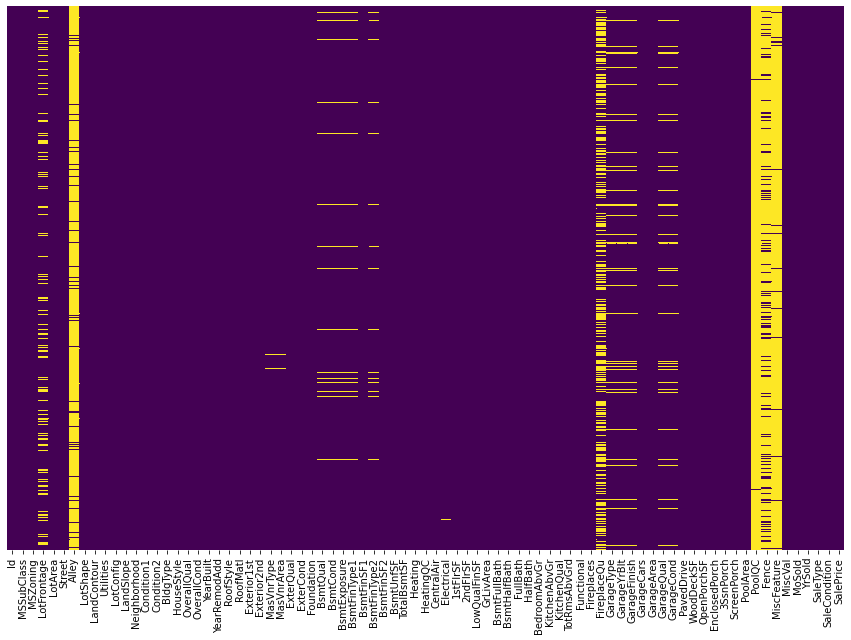

In [5]:
#visualizing null values
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- The yellow lines represent null values. 
- A dataframe with no null values will be all purple.

In [6]:
null_count = pd.DataFrame(df.isnull().sum().sort_values(ascending=False), columns=["count"])
null_count

,count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
...,...
ExterQual,0
Exterior2nd,0
Exterior1st,0
RoofMatl,0


- null_count variable is a dataframe that counts the number of null values in each column. 
- Columns with no null values are of no interest for this section.

In [7]:
null_count[null_count['count']>0]

,count
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


- The first 5 columns in the null_count dataframe are missing nearly 50% or more entries. 
- There is simply too many missing values to fill with substitute values hence I will drop these columns.

In [8]:
null_count[null_count['count']>600].index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [9]:
#dropping the columns
df = df.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],axis=1)

In [10]:
null_count = null_count[(null_count['count']<600) & (null_count['count']>0)]
null_count

,count
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81
GarageQual,81
BsmtFinType2,38
BsmtExposure,38
BsmtQual,37
BsmtCond,37


- The columns above are missing a smaller proportion of values hence I will substitute missing value.
- For float or integer columns, I will fill using the median value of that column.
- For object/string columns, I will fill using the mode value of that column.

In [11]:
dtype_dict = {}
for i in range(0,len(null_count)):
    dtype_dict[null_count.index[i]] = str(df[null_count.index[i]].dtype)
dtype_dict

{'LotFrontage': 'float64',
 'GarageYrBlt': 'float64',
 'GarageCond': 'object',
 'GarageType': 'object',
 'GarageFinish': 'object',
 'GarageQual': 'object',
 'BsmtFinType2': 'object',
 'BsmtExposure': 'object',
 'BsmtQual': 'object',
 'BsmtCond': 'object',
 'BsmtFinType1': 'object',
 'MasVnrArea': 'float64',
 'MasVnrType': 'object',
 'Electrical': 'object'}

In [12]:
null_count["dtype"] = pd.Series(dtype_dict)
null_count

<ipython-input-12-cde2ad3adb61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  null_count["dtype"] = pd.Series(dtype_dict)


,count,dtype
LotFrontage,259,float64
GarageYrBlt,81,float64
GarageCond,81,object
GarageType,81,object
GarageFinish,81,object
GarageQual,81,object
BsmtFinType2,38,object
BsmtExposure,38,object
BsmtQual,37,object
BsmtCond,37,object


In [13]:
for i in range(0,len(null_count)):
    if df[null_count.index[i]].dtype == 'float64':
        df[null_count.index[i]] = df[null_count.index[i]].fillna(df[null_count.index[i]].median())
    else:
        df[null_count.index[i]] = df[null_count.index[i]].fillna(df[null_count.index[i]].mode()[0])

- Columns with float values have been filled using the median value of that column.
- Columns with string values have been filled using the mode value of that column.

<AxesSubplot:>

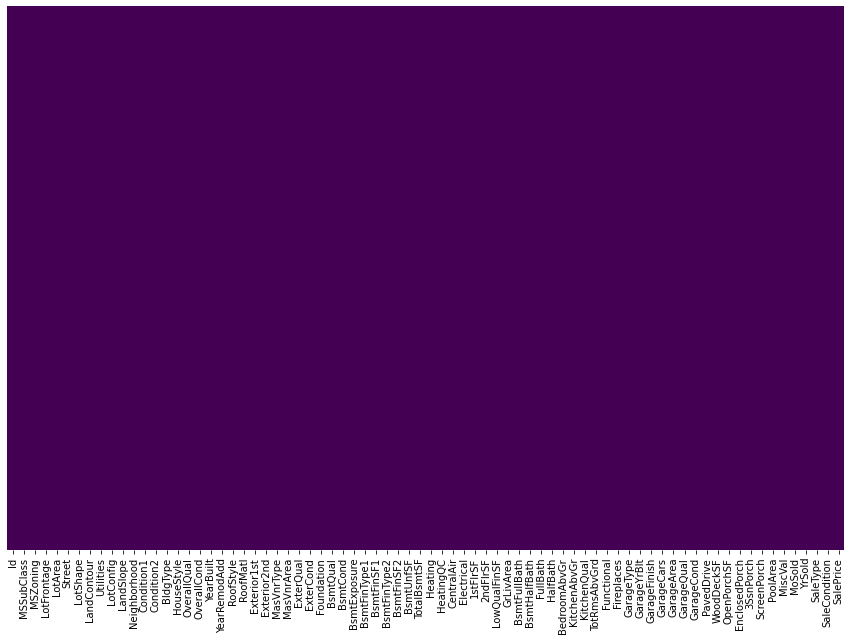

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- No null values in the dataset anymore.

<strong>II) Correlation Analysis</strong>
- One important assumption of multiple linear regression is that independent variables are not highly correlated with each other. 
- A general rule is that if 2 independent variables have a correlation coefficient of 0.7 or more, one of them must be dropped to prevent multicollinearity. 

In [15]:
corr = df.corr() #calculates correlation coefficient between every variable
high_corr_cols = corr.index[abs(corr['SalePrice']) > 0.3] #grabs variables that have a correlation coefficient >.3 with SalePrice

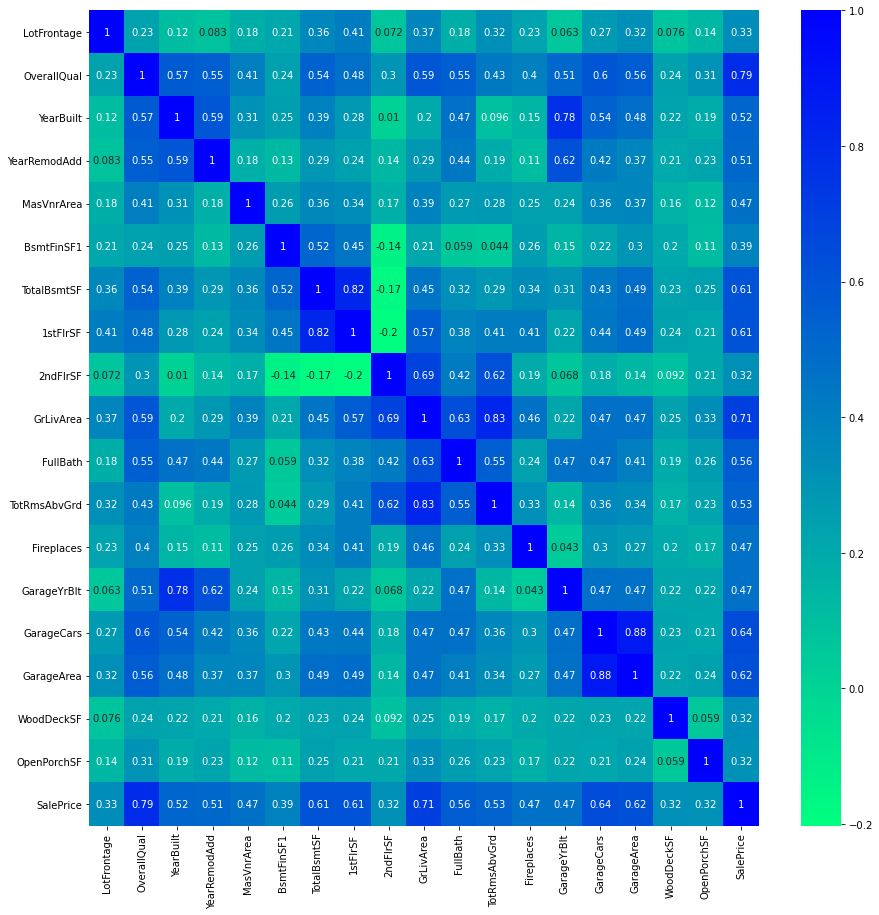

In [16]:
plt.figure(figsize=(15,15)) 
g = sns.heatmap(df[high_corr_cols].corr(),annot=True,cmap="winter_r")

- To prevent multicollinearity, if there are independent variables that have a correlation coefficient of 0.7 or higher, I will drop one of them.
- The following columns will be dropped: YearBuilt, TotalBsmtSF, GrLivArea, GarageCars

In [17]:
df = df.drop(['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'],axis=1)

In [18]:
high_corr_cols = high_corr_cols.drop(['YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'])

In [19]:
high_corr_cols

Index(['LotFrontage', 'OverallQual', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', '1stFlrSF', '2ndFlrSF', 'FullBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice'],
      dtype='object')

<strong>III) Categorical Columns</strong>
- Since string data cannot be used in the linear regression model, I will have to convert the categorical columns into dummy variables.

In [20]:
categorical_cols = df.dtypes[df.dtypes == 'object'].index

In [21]:
df[categorical_cols].isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

- No null values in the categorical columns.

In [22]:
dummy_vars = pd.get_dummies(df[categorical_cols])

In [23]:
dummy_vars

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1456,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1457,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1458,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


- The categorical columns have been converted to dummy variables and stored as a new dataframe called <strong>dummy_vars</strong>

<strong>Summary of steps so far:</strong>
- I now have 3 dataframes. The first is called <strong>df</strong> and it is the original dataframe I started with.
- The second dataframe is <strong>high_corr_cols</strong> which consist of features that have a correlation of greater than 0.3 with SalesPrice.
- The thord dataframe is <strong>dummy_vars</strong> which took all the categorical columns and converted them into dummy variables.
- I will join <strong>high_corr_cols</strong> and <strong>dummy_vars</strong> and use this dataframe to develop my model.

In [24]:
train = pd.concat([df[high_corr_cols],dummy_vars],axis=1)

In [25]:
train

,LotFrontage,OverallQual,YearRemodAdd,MasVnrArea,BsmtFinSF1,1stFlrSF,2ndFlrSF,FullBath,TotRmsAbvGrd,Fireplaces,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,7,2003,196.0,706,856,854,2,8,0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,6,1976,0.0,978,1262,0,2,6,1,...,0,0,0,1,0,0,0,0,1,0
2,68.0,7,2002,162.0,486,920,866,2,6,1,...,0,0,0,1,0,0,0,0,1,0
3,60.0,7,1970,0.0,216,961,756,1,7,1,...,0,0,0,1,1,0,0,0,0,0
4,84.0,8,2000,350.0,655,1145,1053,2,9,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,6,2000,0.0,0,953,694,2,7,1,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,6,1988,119.0,790,2073,0,2,7,2,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,7,2006,0.0,275,1188,1152,2,9,2,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,5,1996,0.0,49,1078,0,1,5,0,...,0,0,0,1,0,0,0,0,1,0


# Developing the Model

- I) Splitting the data into 2 datasets - one for developing the model and the other to test it.

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = train.drop(['SalePrice'],axis=1)
y = train['SalePrice']

- X is set to the independent variables.
- y is set to the dependent variable.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

- The <strong>train</strong> dataframe is split 70:30. 70% will be used to train the model, and 30% to test it.

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
#instantiating
lm = LinearRegression()

In [31]:
#fitting the model
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
#predicting prices for the Test portion of the dataset
predictions = lm.predict(X_test)

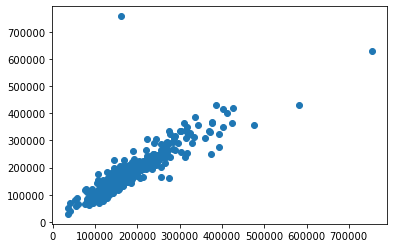

In [33]:
plt.scatter(y_test, predictions)

- y_test (actual house prices) is plotted against predictions (predicted house prices). 
- A linear distribution is indicative of an accurate model.

C:\Users\obaid\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

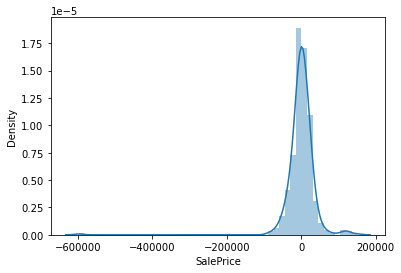

In [42]:
sns.distplot((y_test - predictions))

- For the model to be valid, its residuals must follow a normal distribution, as is the case here.

# Model Evaluation

In [35]:
from sklearn import metrics

In [36]:
metrics.mean_absolute_error(y_test,predictions)

20003.41693718913

- The model's prediction is, on average, $20,003 away from the actual price of the house. 

In [43]:
np.sqrt(metrics.mean_squared_error(y_test,predictions)) 

39491.947112986505

- RMSE is considered to be a more accurate depiction of how much the predicted values are from the actual value.
- Contrary to MAE, RMSE states that the model's prediction is, on average, about $40,000 away from the actual value of the house.

In [44]:
metrics.explained_variance_score(y_test, predictions)

0.752201267386352

- R-sq tells us how much of variation in the dependent variable could be explained by the dependent variables.
- In this case, 75% of the variation in house prices are explained by the dependent variables in the dataset.